Finding maximum contrast
========================

If you want to find the maximum contrast available, use `.optim_solve()`. This method uses *scipy's* minimization algorithms to solve the current silent substitution problem. Specifically, it uses the sequential quadratic least squares programming method with the `minimize` function.

To maximise contrast, don't set the target_contrast property.

************************************************************
*************** Silent Substitution Problem ****************
************************************************************
Device: STLAB_1 (binocular, left eye)
Background: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Ignoring: ['R']
Minimising: ['S', 'M', 'L']
Modulating: ['I']
Target contrast: None
> No target contrast specified, will aim to maximise.
> Performing local optimization with SLSQP.
Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.21631118296297988
            Iterations: 66
            Function evaluations: 782
            Gradient evaluations: 66


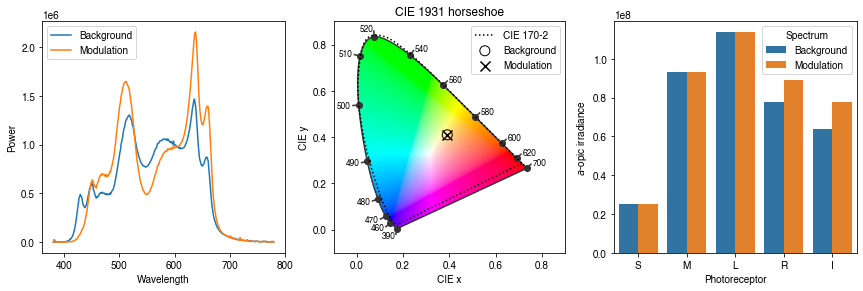

In [4]:
from pysilsub.problem import SilentSubstitutionProblem as SSP

# Load some example data for a 10-primary system
ssp = SSP.from_json('../../data/STLAB_1_York.json')

ssp.background = [.5] * ssp.nprimaries
ssp.ignore = ['R']
ssp.minimize = ['S', 'M', 'L']
ssp.modulate = ['I']
ssp.print_problem()
result = ssp.optim_solve()
_ = ssp.plot_solution(result.x)

In the event that we specify a background spectrum, as above, `optim_solve()` will only optimize the modulation spectrum. This is a big constraint on the optimisation and is why in this case we only got about 21% contrast on melanopsin. Getting more contrast is easier if you don't care what the background spectrum is.

************************************************************
*************** Silent Substitution Problem ****************
************************************************************
Device: STLAB_1 (binocular, left eye)
Background: None
Ignoring: ['R']
Minimising: ['S', 'M', 'L']
Modulating: ['I']
Target contrast: None
> No background specified, will optimise background.
> No target contrast specified, will aim to maximise.
> Performing local optimization with SLSQP.
Iteration limit reached    (Exit mode 9)
            Current function value: -0.6812695845749122
            Iterations: 100
            Function evaluations: 2209
            Gradient evaluations: 100


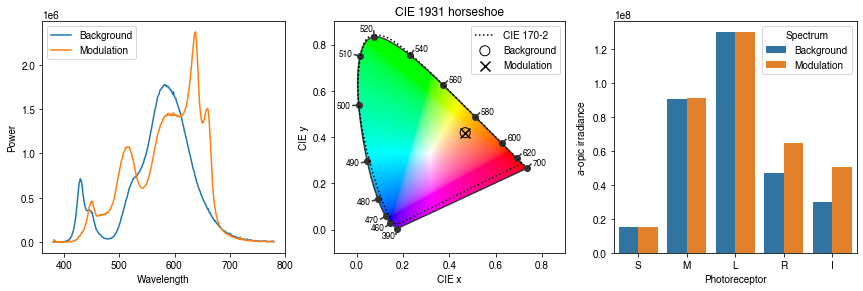

In [5]:
ssp.background = None
ssp.print_problem()
result = ssp.optim_solve()
_ = ssp.plot_solution(result.x)

In the above example, `.optim_solve()` was free to optimise the background, so it was able to find more contrast (~68%). 

But you can probably get even more. *Scipy's* `minimize` function, which is the default of `.optim_solve()`, is a *local* minimizer. It starts with an initial random guess of the primary inputs for the background and modulation spectrum and works from that point to minimize the objective function (which in this case was to maximize contrast). Due to the random starting point on the function landscape, the minimum it finds is unlikely to be the global minimum. 

If you have enough time, can tell `.optim_solve()` to search for the global minimum, in which case it will use *Scipy's* `basinhopping` algorithm. This performs a series of local searches, each with a different starting point. 

> No background specified, will optimise background.
> No target contrast specified, will aim to maximise.
> Performing global optimization with basinhopping and SLSQP
basinhopping step 0: f -0.707965
basinhopping step 1: f -1.60838 trial_f -1.60838 accepted 1  lowest_f -1.60838
found new global minimum on step 1 with function value -1.60838
basinhopping step 2: f -1.79638 trial_f -1.79638 accepted 1  lowest_f -1.79638
found new global minimum on step 2 with function value -1.79638
basinhopping step 3: f -1.68793 trial_f -1.68793 accepted 1  lowest_f -1.79638
basinhopping step 4: f -1.68793 trial_f -1.02978 accepted 0  lowest_f -1.79638
basinhopping step 5: f -1.58133 trial_f -1.58133 accepted 1  lowest_f -1.79638
basinhopping step 6: f -1.03954 trial_f -1.03954 accepted 1  lowest_f -1.79638
basinhopping step 7: f -1.87683 trial_f -1.87683 accepted 1  lowest_f -1.87683
found new global minimum on step 7 with function value -1.87683
basinhopping step 8: f -1.87683 trial_f -0.332944 acce

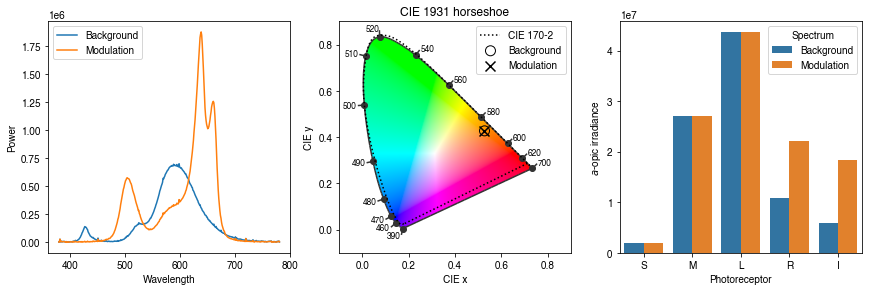

In [5]:
result = ssp.optim_solve(global_search=True)
_ = ssp.plot_solution(result.x)